In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, TensorBoard
from keras.callbacks import LambdaCallback
from keras import backend as K

import tensorflow as tf

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
mnist.train.images.shape

(55000, 784)

In [14]:
batch_x, batch_y = mnist.train.next_batch(batch_size=10)

In [15]:
batch_x.shape

(10, 784)

In [16]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

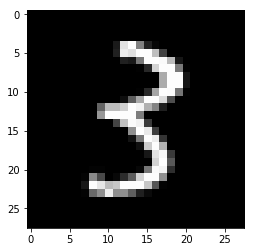

In [17]:
plt.imshow(batch_x[5].reshape((28, 28)), cmap='gray')

In [18]:
import tensorflow as tf
NUM_HIDDEN = 20
NUM_OUTPUT = 10

# Using Keras - Alt

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(units=NUM_HIDDEN, activation='relu', input_shape=(784,)))
model.add(Dense(units=NUM_OUTPUT, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
TB = TensorBoard(log_dir='./logs', histogram_freq=1,
                            write_graph=True,  write_images=False)

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(mnist.train.images, 
                    mnist.train.labels,
                    epochs=10,
                    validation_data=(mnist.validation.images, mnist.validation.labels),
                    callbacks=[TB])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s - loss: 0.4194 - acc: 0.8830 - val_loss: 0.2499 - val_acc: 0.9278
Epoch 2/10
55000/55000 [==============================] - 4s - loss: 0.2497 - acc: 0.9294 - val_loss: 0.2175 - val_acc: 0.9396
Epoch 3/10
55000/55000 [==============================] - 5s - loss: 0.2182 - acc: 0.9379 - val_loss: 0.1991 - val_acc: 0.9456
Epoch 4/10
55000/55000 [==============================] - 5s - loss: 0.1990 - acc: 0.9442 - val_loss: 0.2001 - val_acc: 0.9448
Epoch 5/10
55000/55000 [==============================] - 4s - loss: 0.1870 - acc: 0.9477 - val_loss: 0.1886 - val_acc: 0.9460
Epoch 6/10
55000/55000 [==============================] - 5s - loss: 0.1771 - acc: 0.9505 - val_loss: 0.1797 - val_acc: 0.9510
Epoch 7/10
55000/55000 [==============================] - 5s - loss: 0.1689 - acc: 0.9526 - val_loss: 0.1842 - val_acc: 0.9496
Epoch 8/10
55000/55000 [==============================] - 5s -

In [ ]:
!tensorboard --logdir=logs

Starting TensorBoard b'54' at http://Ramseys-MacBook-Pro.local:6006
(Press CTRL+C to quit)


# Use Keras

In [12]:
import keras as K

Using TensorFlow backend.


In [18]:
K.backend.clear_session()
model = K.models.Sequential()
model.add(K.layers.Dense(units=NUM_HIDDEN, activation='relu', input_shape=(784,)))
model.add(K.layers.Dense(units=NUM_OUTPUT, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'K' is not defined

In [ ]:
TB = TensorBoard(log_dir='./logs', histogram_freq=1,
                            write_graph=True,  write_images=False)

In [14]:
model.fit(mnist.train.images, mnist.train.labels,
          batch_size=10, epochs=5,
          validation_data=(mnist.validation.images, mnist.validation.labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5


TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("dense_1_input:0", shape=(?, 784), dtype=float32) is not an element of this graph.

In [17]:
model.evaluate

<bound method Sequential.evaluate of <keras.models.Sequential object at 0x1279d8e10>>